> *The creation of the lessons in this unit relied heavily on the existing lessons created by Mrs. FitzZaland as well as the [lecture series](https://github.com/milaan9/11_Python_Matplotlib_Module) produced by Dr. Milaan Parmar and [the guide](https://matplotlib.org/stable/users/explain/quick_start.html#quick-start) provided by Matplotlib.*

# Matplotlib Introduction

**[Matplotlib](https://matplotlib.org/)** is a Python 2D plotting library that produces high-quality charts and figures, which helps us visualize extensive data to understand better. Pandas is a handy and useful data-structure tool for analyzing large and complex data.

This tutorial covers some basic usage patterns and best practices to help you get started with Matplotlib.

You can also watch [this 30 minute video](https://www.youtube.com/watch?v=DAQNHzOcO5A) as an introduction to Matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## A simple example

Matplotlib graphs your data on `Figure`s (e.g., windows, Jupyter
widgets, etc.), each of which can contain one or more `axes.Axes`, an
area where points can be specified in terms of x-y coordinates (or theta-r
in a polar plot, x-y-z in a 3D plot, etc.).  The simplest way of
creating a Figure with an Axes is using `pyplot.subplots`. We can then use
`Axes.plot` to draw some data on the Axes:


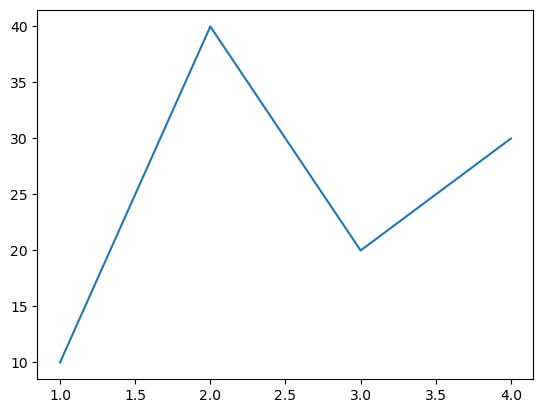

In [2]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [10, 40, 20, 30])  # Plot x and y data on the axes.
plt.show()

Note that to get this Figure to display, you may have to call `plt.show()`,
depending on your backend. 


## Parts of a Figure

Here are the components of a Matplotlib Figure.

![anatomy](images/fig_anatomy.png)

### `Figure`

The Figure keeps
track of all the child `Axes`, a group of
"special" Artists (titles, figure legends, colorbars, etc), and
even nested subfigures.

The easiest way to create a new Figure is with pyplot:

```python
import matplotlib.pyplot as plt

fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                              ['left', 'right_bottom']])
```

It is often convenient to create the Axes together with the Figure, but you
can also manually add Axes later on. 


### `Axes`

An `Axes` contains a region for
plotting data within the `Figure`, and usually includes two (or three in the case of 3D)
`Axis` objects (be aware of the difference
between **Axes** and **Axis**) that provide ticks and tick labels to
provide scales for the data in the Axes. Each `Axes` also
has a title, an x-label, and a y-label.

## Types of inputs to plotting functions

Plotting functions expect `numpy.array` or `numpy.ma.masked_array` as
input, or objects that can be passed to `numpy.asarray`.
Classes that are similar to arrays ('array-like') such as `pandas`
data objects and `numpy.matrix` may not work as intended.  Common convention
is to convert these to `numpy.array` objects prior to plotting.
For example, to convert a `numpy.matrix` ::

```python
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)
```

Most methods will also parse a string-indexable object like a *dict*, a
`structured numpy array`, or a `pandas.DataFrame`.  Matplotlib allows you
to provide the `data` keyword argument and generate plots passing the
strings corresponding to the *x* and *y* variables.

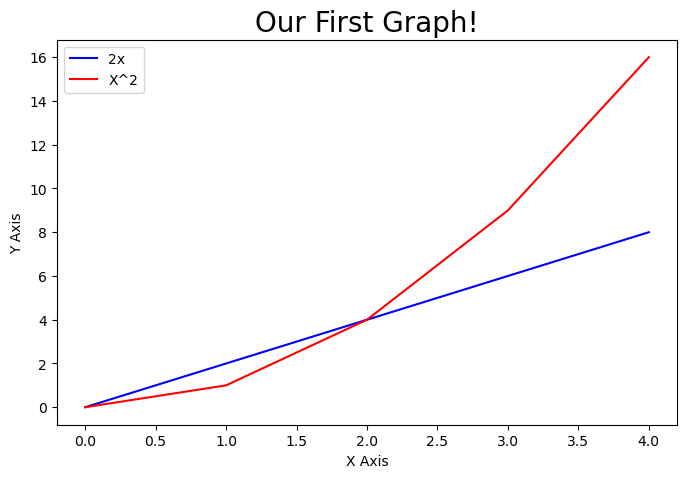

In [3]:
x = [0,1,2,3,4]
y = [0,2,4,6,8]

# Create a figure and set the aspect ratio
plt.figure(figsize=(8,5))

# Line 1
plt.plot(x,y, c='b', label='2x')

## Line 2
# select interval we want to plot points at
x2 = np.arange(0,5,1)

# Plot part of the graph as line
plt.plot(x2, x2**2, 'r', label='X^2')

# Add a title
plt.title('Our First Graph!', fontsize= 20)

# X and Y labels
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# Add a legend
plt.legend()

# Show plot
plt.show()


## Coding styles

### The explicit and the implicit interfaces

As noted above, there are essentially two ways to use Matplotlib:

- Explicitly create Figures and Axes, and call methods on them (the
  "object-oriented (OO) style").
- Rely on pyplot to implicitly create and manage the Figures and Axes, and
  use pyplot functions for plotting.

See `api_interfaces` for an explanation of the tradeoffs between the
implicit and explicit interfaces.

So one can use the OO-style



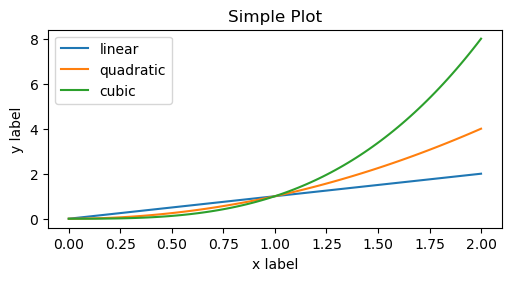

In [4]:
# Create the x coordinates
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.
plt.show()

or the pyplot-style:



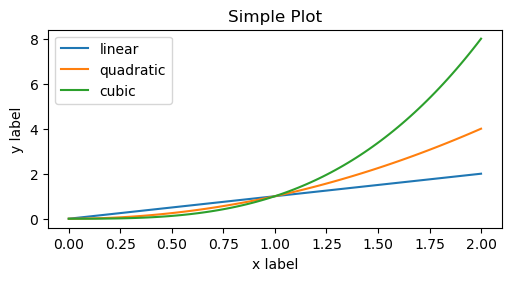

In [5]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

Matplotlib's documentation and examples use both the OO and the pyplot
styles. In general, we suggest using the OO style, particularly for
complicated plots, and functions and scripts that are intended to be reused
as part of a larger project. However, the pyplot style can be very convenient
for quick interactive work.

### Making a helper functions

If you need to make the same plots over and over again with different data
sets, or want to easily wrap Matplotlib methods, use the recommended
signature function below.

In [6]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

which you would then use twice to populate two subplots:



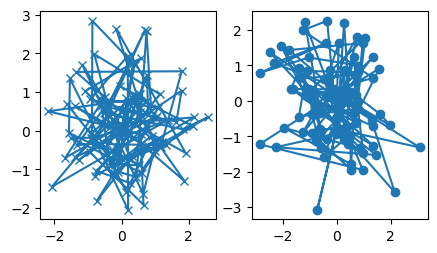

In [7]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

## Styling Artists

In the plot below we manually set the *color*, *linewidth*, and *linestyle* of the
Artists created by `Axes.plot`.

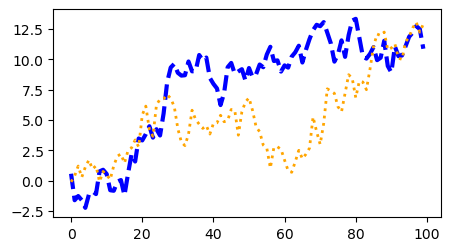

In [8]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2, linestyle=':')
plt.show()

### Colors

Some Artists will take multiple colors.  i.e. for
a `Axes.scatter` plot, the edge of the markers can be different colors
from the interior:



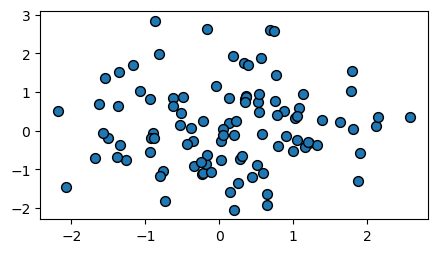

In [9]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k')

## Labelling plots

### Axes labels and text

`Axes.set_xlabel`, `Axes.set_ylabel`, and `Axes.set_title` are used to
add text in the indicated locations.  Text can also be directly added to plots using
`Axes.text`:



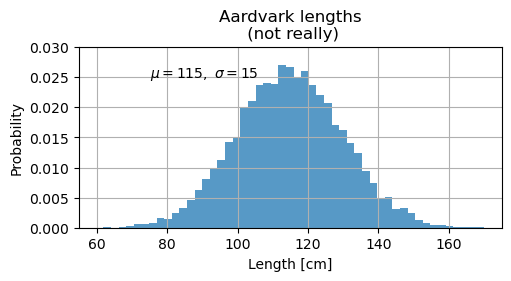

In [10]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

### Legends

Often we want to identify lines or markers with a `Axes.legend`:

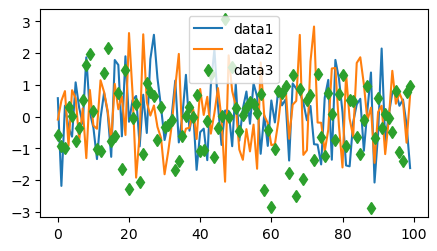

In [11]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend()
plt.show()

Legends in Matplotlib are quite flexible in layout, placement, and what
Artists they can represent. 

## Bar Charts

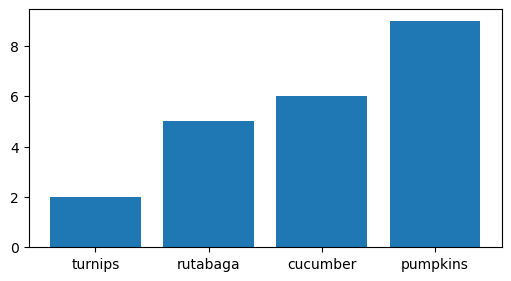

In [12]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']
ratings = [2, 5, 6, 9]
ax.bar(categories, ratings)
plt.show()

One caveat about categorical plotting is that some methods of parsing
text files return a list of strings, even if the strings all represent
numbers or dates.  If you pass 1000 strings, Matplotlib will think you
meant 1000 categories and will add 1000 ticks to your plot!

## Working with multiple Figures and Axes

You can open multiple Figures with multiple calls to
``fig = plt.figure()`` or ``fig2, ax = plt.subplots()``.  By keeping the
object references you can add Artists to either Figure.

Multiple Axes can be added a number of ways, but the most basic is
``plt.subplots()`` as used above.  One can achieve more complex layouts,
with Axes objects spanning columns or rows, using `~.pyplot.subplot_mosaic`.


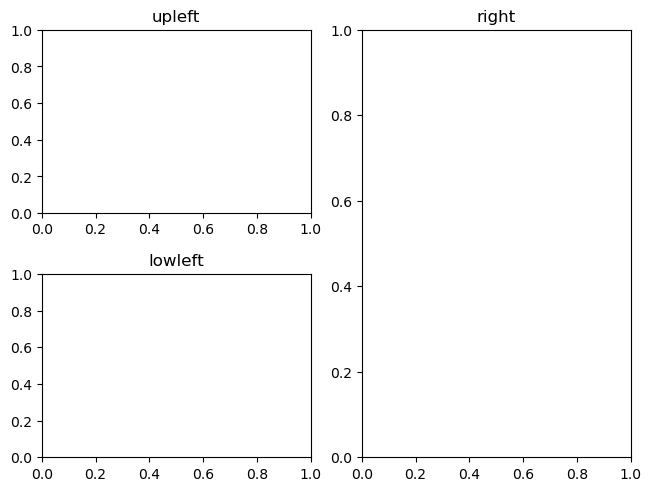

In [13]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')
plt.show()

## Some "Real-World" Examples

Here are some examples that start from loading a `.csv` file of data from the **EA Sports FIFA 2018** game.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load FIFA data
fifa = pd.read_csv('fifa_data.csv')

# Display the first 5 rows
fifa.head(5)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


# Histogram

Creating a histogram of the player ratings:

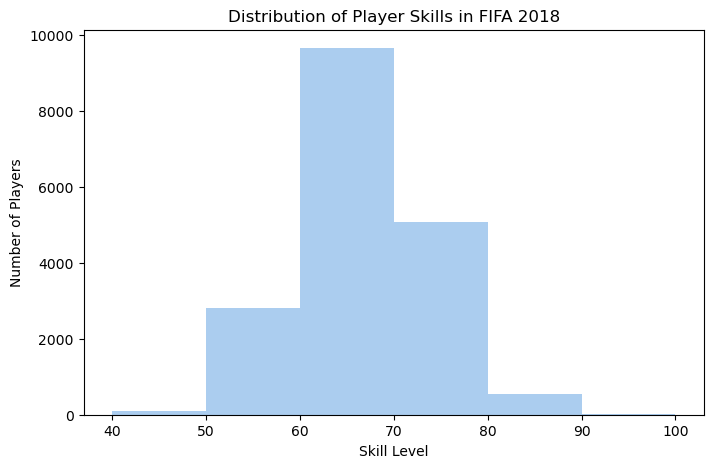

In [15]:
# Define the histogram bin edges as a list of integers
bins = [40,50,60,70,80,90,100]

# Create a figure
plt.figure(figsize=(8,5))

# Plot a histogram of the Overall player ratings from the DataFrame
plt.hist(fifa.Overall, bins=bins, color='#abcdef')

# Set the location of the "ticks" on the x-axis to be at the bin edges
plt.xticks(bins)

# Set the plot labels
plt.ylabel('Number of Players')
plt.xlabel('Skill Level')
plt.title('Distribution of Player Skills in FIFA 2018')

# Plot the figure
plt.show()

## Bar Chart

Similar to the histogram, we can use a bar chart to display the number of players who come from the ten most commonly found countries.

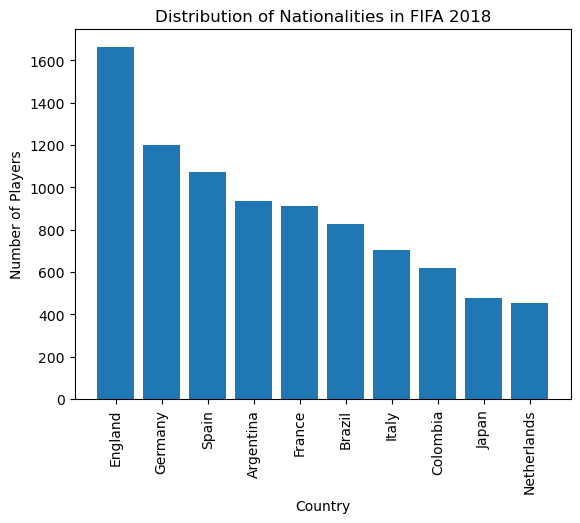

In [16]:
# Determine how many players come from each nation
# Note that the .value_counts() function automatically sorts
# the categories from highest counts to lowest.
nation_counts = fifa['Nationality'].value_counts()

number_of_nations = 10

# Select top `number_of_nations` represented nations and convert this to a dictionary
nation_counts = nation_counts.head(number_of_nations)

# Create a bar chart using the values in the Series
plt.bar(range(number_of_nations), nation_counts, align='center')

# Create the tick labels using the row names of the Series
plt.xticks(range(number_of_nations), nation_counts.index, rotation=90)

# Set the plot labels
plt.ylabel('Number of Players')
plt.xlabel('Country')
plt.title('Distribution of Nationalities in FIFA 2018')

plt.show()

## Pie Chart

Here we will create a pie chart of the left-footed vs right-footed players.

There are many ways to do this in pandas, but here is one:

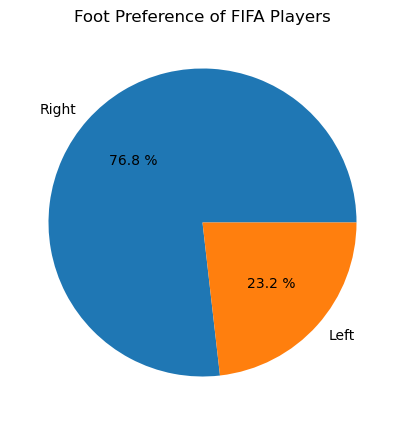

In [17]:
# Use this value counts to set the number for each foot preference
foot_counts = fifa['Preferred Foot'].value_counts()

# Define the figure
plt.figure(figsize=(8,5))

# Make the pie chart
# Note the autopct parameter allows you to format the numbers on your chart
plt.pie(foot_counts, labels = foot_counts.index, autopct='%.1f %%')

plt.title('Foot Preference of FIFA Players')

plt.show()

Here's another example of a pie chart using this data:

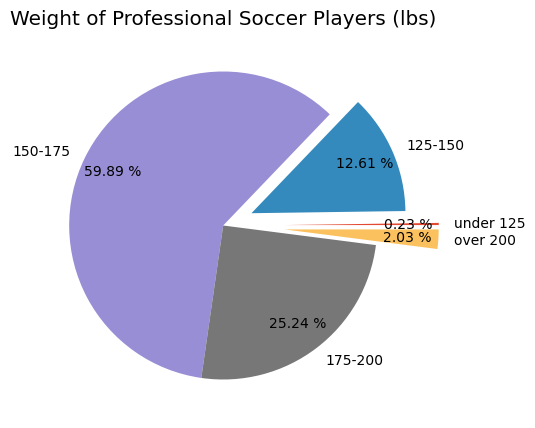

In [18]:
plt.figure(figsize=(8,5), dpi=100)

plt.style.use('ggplot')

# Removes the 'lbs' string and then converts the remaining number to and integer
fifa.Weight = [int(x.strip('lbs')) if type(x)==str else x for x in fifa.Weight]

# Define some categories using the player weight
# and find the .count() in each category.
light = fifa.loc[fifa.Weight < 125].count()[0]
light_medium = fifa[(fifa.Weight >= 125) & (fifa.Weight < 150)].count()[0]
medium = fifa[(fifa.Weight >= 150) & (fifa.Weight < 175)].count()[0]
medium_heavy = fifa[(fifa.Weight >= 175) & (fifa.Weight < 200)].count()[0]
heavy = fifa[fifa.Weight >= 200].count()[0]

weights = [light,light_medium, medium, medium_heavy, heavy]
label = ['under 125', '125-150', '150-175', '175-200', 'over 200']

# An offset for each of the wedges in the pie graph.
# This uses the same order as the input data.
explode = (.4,.2,0,0,.4)

plt.title('Weight of Professional Soccer Players (lbs)')

plt.pie(weights, labels=label, explode=explode, pctdistance=0.8,autopct='%.2f %%')
plt.show()

## Challenge

**1. Download `Challenge_32.ipynb` from Teams.**

**2. Upload this file into your own *Project* on Deepnote by dragging the `Challenge_32.ipynb` file onto the Notebooks tab on the left-hand side.** 

**3. Also download the `.png` files from the Challenge 32 folder and drag these to your Files in Deepnote.** (These will allow you to display the images within your notebook.)

**4. Use this notebook to complete Challenge 32 in Deepnote.**